## IPython Notebook for turning in solutions to the problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 2

### Problem 1a:   write a script to convert declination, inclination, intensity data to North, East and Down.  First we need to import numpy, the module with lots of math functions and pandas with nice data manipulation functions

In [1]:
import numpy as np
import pandas as pd
deg2rad=np.pi/180. # converts degrees to radians

Let's write a little function to do the conversion.  

In [2]:
def dir2cart(data):
    decs,incs,ints=data[0]*deg2rad,data[1]*deg2rad,data[2]
    X=ints*np.cos(decs)*np.cos(incs)
    Y=ints*np.sin(decs)*np.cos(incs)
    Z=ints*np.sin(incs)
    cart=np.array([X,Y,Z]).transpose()
    return cart

Now let's read in a data file with some geomagnetic field vectors in it.

In [3]:
# read in the data and transpose it to rows of dec, inc, int
data=np.loadtxt('Chapter_2/ps2_prob1_data.txt').transpose()
print dir2cart(data)

[[ 21352.55524831   2093.63634727  23332.08409238]
 [  4504.44337072   -259.7245706   -1225.86288284]
 [ 23546.1300489    3141.72451736  33426.255268  ]
 [ 14629.0911691    1022.96570709  21021.51776849]
 [ 23150.99484809   2965.71083857  30861.24994328]
 [ 14767.09147922   2127.97038951    651.40495181]
 [ 18929.94924879   -231.28446662  25961.37752135]
 [  8342.98700429    759.27129675   8495.26107758]
 [ 10858.76521357   2606.95887762  19818.79867013]
 [ 30243.76260383   1532.08292009  41375.84902637]]


### Problem 1b: Read in locations from 10 random spots on Earth and calculate the IGRF vectors at each place. 

First we have to understand how the function pmag.get_unf() works.  To do this, we need to tell the notebook where the pmag module lives, import it and print out the doc string for get_unf(): 

In [4]:
import pmagpy.pmag as pmag
print pmag.get_unf.__doc__


    Called with get_unf(N).
 subroutine to retrieve N uniformly distributed directions
 using the way described in Fisher et al. (1987).
    


Now we can use that function to generate a list of random points on the Earth's surface.  

In [5]:
places=pmag.get_unf(10)
print places

[[  3.52809686e+01   3.19478785e+01]
 [  1.06262145e+02  -1.02737936e+01]
 [  5.84021807e+01  -7.77962017e+00]
 [  1.17196375e+01   8.86726361e+00]
 [  1.19213622e+02   5.49664742e+01]
 [  5.59384890e+00   1.16616508e-01]
 [  2.01434352e+02  -6.51337266e+00]
 [  1.70767932e+02  -6.30655304e+01]
 [  2.18341147e+02   2.55870783e+01]
 [  1.02462481e+02  -2.93387244e+01]]


Now let's find out about ipmag.igrf

In [6]:
import pmagpy.ipmag
print ipmag.igrf.__doc__


    prints out Declination, Inclination, Intensity data from an input list with format: [Date, Altitude, Latitude, Longitude]
    Date must be in format XXXX.XXXX with years and decimals of a year (A.D.)
    


And now we can ship the data in places to doigrf.

In [7]:
for place in places:
    print ipmag.igrf([2006,0,place[1],place[0]])

[  3.68239665e+00   4.75952520e+01   4.44059325e+04]
[  4.30016946e-01  -3.92117630e+01   4.68644619e+04]
[  3.52392827e+02  -3.43711305e+01   3.69352776e+04]
[  3.58856581e+02  -5.99792385e+00   3.37488779e+04]
[   348.97823391     72.60451854  59915.49800463]
[  3.55185058e+02  -2.84549761e+01   3.21747766e+04]
[  9.88882910e+00  -1.27456900e+01   3.38886738e+04]
[  5.66138408e+01  -8.13876537e+01   6.47141380e+04]
[  1.19846842e+01   4.56316093e+01   3.87563828e+04]
[   351.9090671     -65.54382142  56326.27548941]


## Problem 1c:  Take the output from 1b and call ``dir2cart''. 

In [15]:
data=[] # make a blank list
for place in places:
    Dir=ipmag.igrf([2006,0,place[1],place[0]])
    data.append(Dir) # append to the data list
data=np.array(data).transpose() # dir2cart takes arrays of data
print dir2cart(data)

[[ 29883.91752386   1923.28661846  32789.31655114]
 [ 36310.25204106    272.52123978 -29627.16863494]
 [ 30217.99577504  -4035.79202813 -20851.85468725]
 [ 33557.44243805   -669.77576247  -3526.50212906]
 [ 17582.26313812  -3424.57795118  57175.19733189]
 [ 28187.97215916  -2374.41331567 -15330.25225252]
 [ 32562.53697469   5676.53062283  -7476.65699771]
 [  5332.66554444   8091.66442093 -63984.43011155]
 [ 26510.42005849   5627.55746327  27705.33225197]
 [ 23086.8001062   -3282.01080394 -51272.57918662]]


## Problem 2:  Take the output from Problem 1c and plot as an equal area projection (first by hand and then with ipmag functions).  The ipmag functions call pmagplotlib and use matplotlib, so these will have to be imported as well. 

In [9]:
import pmagplotlib
import matplotlib.pyplot as plt
%matplotlib inline

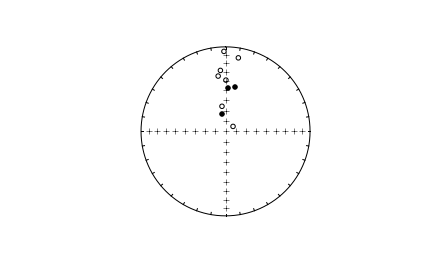

In [16]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(data[0],data[1]) # put on the dots

### Problem 3: Use the dipole formula ($\tan (I) = 2 \tan (\lambda)$ where $I$ is inclination and $\lambda$ is latitude and calculate the GAD field at 36 $^{\circ}$N.  Note that declination is always zero for a GAD field.  

In [11]:
lat = 36.*deg2rad # remember to convert to radians!
inc = np.arctan(2.*np.tan(lat)) /deg2rad # and back! 
print '%7.1f'%(inc) # and print it out

   55.5


Let's use the pmag function dia_vgp.  First let's figure out what it does:

In [12]:
print pmag.dia_vgp.__doc__


    converts declination, inclination, alpha95 to VGP, dp, dm
    takes input as (Decs, Incs, a95, Site latitudes, Site Longitudes).  
    These can be lists or individual values.
    


Now we can use it to convert our directions to VGPs. Note that alpha95 is require but is not given here so we supply a zero in its place. Note also that westward longitudes are indicated by minus signs

In [18]:
vgp_lat,vgp_lon,dp,dp= pmag.dia_vgp(345,47,0.,36,-112) 
print '%7.1f %7.1f'%(vgp_lat,vgp_lon)

  130.6    75.1
